### Imports

In [1]:
import numpy as np
from numpy.fft import fft2
from time import time
from matplotlib import pyplot as plt

### Fourier transform

In [2]:
def get_random_vector(size):
    """ Creates random vector 
    
    :arg 
        size: size of the random vector will be (`size`, 1)
        
    :returns
        random vector of given size
    """
    
    return np.random.rand(size, 1)


def dft(x):
    """ Makes discrete fourier transform on given vector
    
    :arg
        x: vector which will be transformed
    
    :returns
        fourier matrix which can be useful in inverse function and transformed vector
    """
    
    n = x.shape[0]

    xi = np.exp(- 2 * np.pi * 1j / n)

    f = np.zeros((n, n), dtype=complex)

    f[0, :] = 1
    f[:, 0] = 1

    for j in range(1, n):
        for k in range(1, n):
            f[j, k] = xi ** (j * k)

    y = f @ x

    return f, y


def idft(f, y):
    """ Makes inverse discrete fourier transform 
    
    :arg
        f: fourier matrix used in discrete fourier transform
        y: vector which is a result of discrete fourier transform
        
    :returns
        original vector from which `y` was made by discrete fourier transform
    """
    
    return np.conjugate(f @ y.conj()) / y.shape[0]


def fft_rec(x, n, s):
    """ Recursive fast fourier transform 
    
    :arg
        x: vector which is being transformed
        n: size of the part of the vector which is currently being processed
        s: in this call of the function every `s` item in vector is being processed
        
    :returns
        vector or part of it
    """
    
    if n == 1:
        return x[0]
    else:
        res = np.empty(n, dtype=complex)
        res[:n//2] = fft_rec(x, n//2, 2*s)
        res[n//2:] = fft_rec(x[s:], n//2, 2*s)

        for k in range(n//2):
            tmp = res[k]
            res[k] = tmp + np.exp(-2 * np.pi * 1j * k / n) * res[k + n//2]
            res[k+n//2] = tmp - np.exp(-2 * np.pi * 1j * k / n) * res[k + n//2]

        return res


def fft(x):
    """ Fast fourier transform 
    
    :arg
        s: vector which will be transformed
        
    :returns
        transformed vector
    """
    
    n = x.shape[0]
    x_1d = x.reshape(n).astype(complex)
    s = 1

    return fft_rec(x_1d, n, s).reshape((n, 1))


def compare(x, y, eps):
    """ Compares two vectors to check if they are the same
    
    :arg
        x, y: vectors to compare
        eps: maximum difference on the same index can be equal to `eps`;
             otherwise vectors are classified as different
    """
    
    
    if np.any(abs(x - y) > eps):
        print("Vectors are different")
    else:
        print(f"Vectors are the same with accuracy {eps}")
        
        
def check_time(x):
    """ Prints time of running 3 functions: dft, fft and numpy.fft.fft2
    
    :arg
        x: vector which will be transformed in every function
    """
    
    start_time = time()
    dft(x)
    time_dft = time() - start_time
    
    start_time = time()
    fft(x)
    time_fft = time() - start_time
    
    start_time = time()
    fft2(x)
    time_numpy = time() - start_time
    
    print("DFT as multiplication of Fourier matrix: {0:.6f}s".format(time_dft))
    print("My implementation of FFT:                {0:.6f}s".format(time_fft))    
    print("Numpy's FFT:                             {0:.6f}s".format(time_numpy))

### Signals

In [3]:
x_max = 100
step = 0.5

def get_separate_functions():
    """ Makes 3 sinus functions: with periods: 2*pi 5*pi, 10*pi
    
    :returns:
        first coordinate of every function (vector) and second coordinate of
        the 3 sinus functions (3 vectors)
    """
    
    x = np.arange(0, x_max, step)
    y1 = np.sin(x)
    y2 = np.sin(2 * x / 5)
    y3 = np.sin(x / 5)
    
    return x, y1, y2, y3
    
    
def get_stationary():
    """ Gets stationary signal made by adding 3 sinus functions 
    
    :returns
        two vectors with coordinates of the sum of functions
    """
    
    x = np.arange(0, x_max, step)
    
    y = np.sin(x) + np.sin(2 * x / 5) + np.sin(x / 5)
    
    return x, y


def get_non_stationary():
    """ Gets non-stationary signal made by 3 sinus functions 
    
    :returns
        two vectors with coordinates of the non-stationary signal made by 3 functions
    """
    
    x = np.arange(0, x_max, step)
    n = len(x)
    
    y = np.empty(n)
    y[:(n//3)] = np.sin(x[:(n//3)])
    y[(n//3):(2 * n // 3)] = np.sin(2 * x[(n//3):(2 * n // 3)] / 5)
    y[(2 * n // 3):] = np.sin(x[(2 * n // 3):] / 5)
    
    return x, y

### Tests - correctness

In [4]:
eps = 10**(-8)
x = get_random_vector(1024)

f, y = dft(x)
y_numpy = fft2(x)

x_after = idft(f, y)

In [5]:
# checking if my transformation and numpy's one return
# the same result with accuracy equal to `eps`

compare(y, y, eps)

Vectors are the same with accuracy 1e-08


In [6]:
# checking if idft(dft(x)) == x with accuracy equal to `eps`

compare(x, x_after, eps)

Vectors are the same with accuracy 1e-08


### Tests - time

In [7]:
# test with vector of size 8
x = get_random_vector(8)
check_time(x)

DFT as multiplication of Fourier matrix: 0.000278s
My implementation of FFT:                0.000257s
Numpy's FFT:                             0.000426s


In [8]:
# test with vector of size 512
x = get_random_vector(512)
check_time(x)

DFT as multiplication of Fourier matrix: 0.207638s
My implementation of FFT:                0.008803s
Numpy's FFT:                             0.000081s


In [9]:
# test with vector of size 4096
x = get_random_vector(4096)
check_time(x)

DFT as multiplication of Fourier matrix: 11.195379s
My implementation of FFT:                0.101436s
Numpy's FFT:                             0.000170s


### Plots

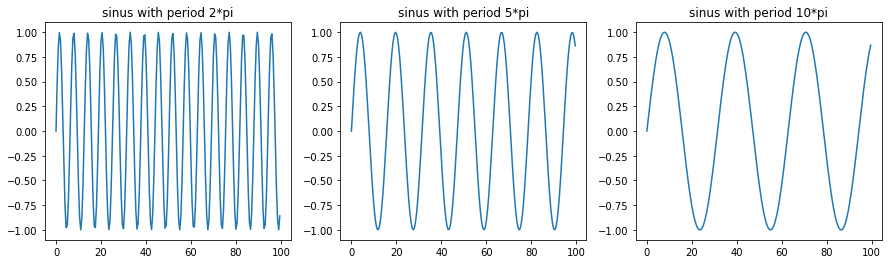

In [10]:
# 3 sinus functions are used: with periods 2*pi, 5*pi and 10*pi 
# here the functions are plotted
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

x, y_2pi, y_5pi, y_10pi = get_separate_functions()

ax[0].plot(x, y_2pi)
ax[0].set_title("sinus with period 2*pi")
ax[1].plot(x, y_5pi)
ax[1].set_title("sinus with period 5*pi")
ax[2].plot(x, y_10pi)
ax[2].set_title("sinus with period 10*pi")

plt.show()

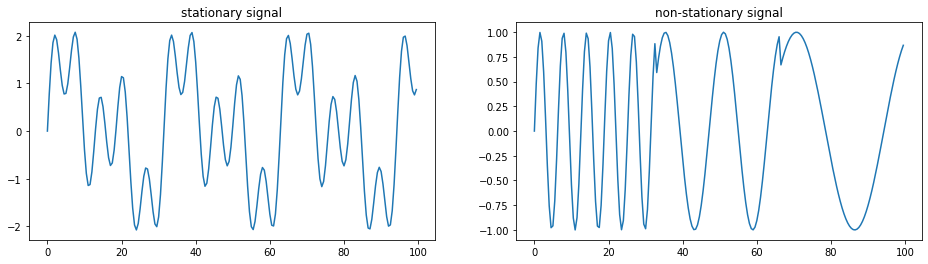

In [11]:
# stationary and non-stationary signals made by 3 functions from
# previous cell are plotted here
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

x_stat, y_stat = get_stationary()
x_non, y_non = get_non_stationary()

ax[0].plot(x_stat, y_stat)
ax[0].set_title("stationary signal")
ax[1].plot(x_non, y_non)
ax[1].set_title("non-stationary signal")

plt.show()

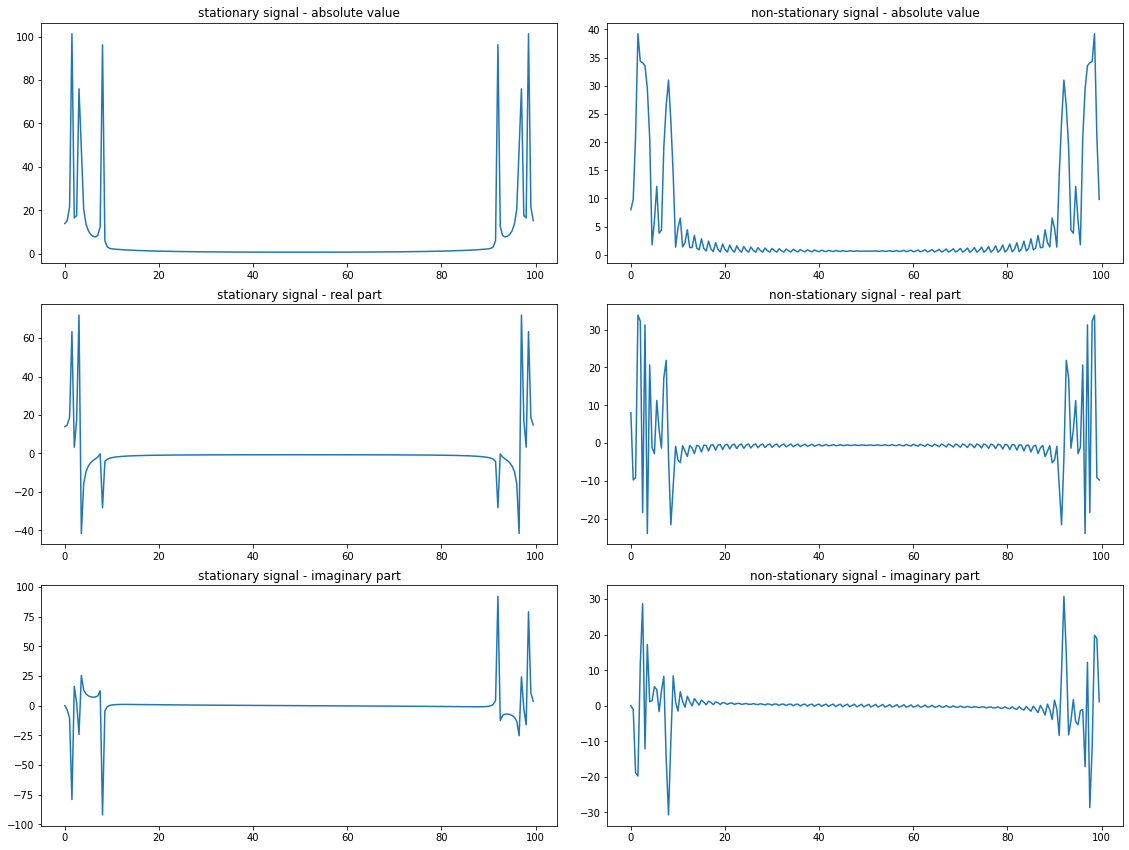

In [12]:
# signals after transformation
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
fig.tight_layout(pad=2.0)

f1, y1 = dft(y_stat)
f2, y2 = dft(y_non)

ax[0, 0].set_title("stationary signal - absolute value")
ax[0, 0].plot(x_stat, np.absolute(y1))

ax[0, 1].set_title("non-stationary signal - absolute value")
ax[0, 1].plot(x_stat, np.absolute(y2))

ax[1, 0].set_title("stationary signal - real part")
ax[1, 0].plot(x_stat, np.real(y1))

ax[1, 1].set_title("non-stationary signal - real part")
ax[1, 1].plot(x_stat, np.real(y2))

ax[2, 0].set_title("stationary signal - imaginary part")
ax[2, 0].plot(x_non, np.imag(y1))

ax[2, 1].set_title("non-stationary signal - imaginary part")
ax[2, 1].plot(x_non, np.imag(y2))

plt.show()